**Author**: Sai krishna Kadari

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data=pd.read_csv('covid_data.csv')
data.head(4)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47328 entries, 0 to 47327
Data columns (total 41 columns):
iso_code                           47052 non-null object
continent                          46776 non-null object
location                           47328 non-null object
date                               47328 non-null object
total_cases                        46714 non-null float64
new_cases                          46502 non-null float64
new_cases_smoothed                 45720 non-null float64
total_deaths                       46714 non-null float64
new_deaths                         46502 non-null float64
new_deaths_smoothed                45720 non-null float64
total_cases_per_million            46438 non-null float64
new_cases_per_million              46438 non-null float64
new_cases_smoothed_per_million     45655 non-null float64
total_deaths_per_million           46438 non-null float64
new_deaths_per_million             46438 non-null float64
new_deaths_smoothed_per_m

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_cases,46714.0,1.053048e+05,1.089826e+06,0.000,6.200000e+01,1.067000e+03,1.149600e+04,3.402992e+07
new_cases,46502.0,1.463590e+03,1.326863e+04,-8261.000,0.000000e+00,1.000000e+01,1.680000e+02,3.211270e+05
new_cases_smoothed,45720.0,1.451104e+03,1.307755e+04,-552.000,5.710000e-01,1.514300e+01,1.734645e+02,2.970411e+05
total_deaths,46714.0,4.181072e+03,3.885370e+04,0.000,1.000000e+00,2.100000e+01,2.480000e+02,1.015043e+06
new_deaths,46502.0,4.365589e+01,3.672083e+02,-1918.000,0.000000e+00,0.000000e+00,3.000000e+00,1.049100e+04
new_deaths_smoothed,45720.0,4.371154e+01,3.574602e+02,-232.143,0.000000e+00,1.430000e-01,3.143000e+00,7.456714e+03
total_cases_per_million,46438.0,1.967496e+03,4.142360e+03,0.000,3.235700e+01,2.903075e+02,2.047809e+03,4.365060e+04
new_cases_per_million,46438.0,2.512236e+01,7.562289e+01,-2212.545,0.000000e+00,1.593500e+00,1.820900e+01,4.944376e+03
new_cases_smoothed_per_million,45655.0,2.474722e+01,5.838065e+01,-269.978,1.490000e-01,3.014000e+00,2.004450e+01,8.829240e+02
total_deaths_per_million,46438.0,5.892360e+01,1.449816e+02,0.000,2.600000e-02,5.114000e+00,3.651100e+01,1.237551e+03


In [5]:
data.describe(include=['O'])

,iso_code,continent,location,date,tests_units
count,47052,46776,47328,47328,20031
unique,211,6,212,276,5
top,NZL,Europe,Cambodia,2020-09-09,tests performed
freq,276,12426,276,212,10847


In [6]:
data['continent'].value_counts()

Europe           12426
Asia             11316
Africa           11052
North America     7397
South America     2818
Oceania           1767
Name: continent, dtype: int64

In [7]:
data['iso_code'].value_counts()

NZL         276
OWID_WRL    276
BRA         276
GBR         276
LUX         276
           ... 
ESH         159
TJK         154
COM         153
LSO         140
HKG          23
Name: iso_code, Length: 211, dtype: int64

In [8]:
data['location'].value_counts()

Cambodia              276
Sweden                276
United States         276
Monaco                276
Dominican Republic    276
                     ... 
Western Sahara        159
Tajikistan            154
Comoros               153
Lesotho               140
Hong Kong              23
Name: location, Length: 212, dtype: int64

## Data Selection and Filtering
For this analysis, we will take the subset of the data
* **iso_code** -alpha 3 code for the country
* **continent**
* **location-country**
* **date**
* **new_cases**-new cases reported on the date
* **new_deaths**-new deaths reported on the date
* **new_tests**-corona tests happened on the date

In [9]:
cols=['iso_code','continent','location','date','new_cases','new_deaths','new_tests']
data2=data.loc[:,cols]

In [10]:
data2.sort_values('date',ascending=False).head(5)

,iso_code,continent,location,date,new_cases,new_deaths,new_tests
47327,NaN,NaN,International,2020-10-01,NaN,NaN,NaN
29580,MNE,Europe,Montenegro,2020-10-01,197.0,5.0,NaN
20725,IRL,Europe,Ireland,2020-10-01,415.0,1.0,NaN
40316,SWE,Europe,Sweden,2020-10-01,397.0,3.0,NaN
29188,MLT,Europe,Malta,2020-10-01,23.0,0.0,NaN


In [11]:
data2.sort_values('date',ascending=False).tail(10)

,iso_code,continent,location,date,new_cases,new_deaths,new_tests
32280,NLD,Europe,Netherlands,2019-12-31,0.0,0.0,NaN
24809,LBN,Asia,Lebanon,2019-12-31,0.0,0.0,NaN
14204,FIN,Europe,Finland,2019-12-31,0.0,0.0,NaN
21278,ISL,Europe,Iceland,2019-12-31,0.0,0.0,NaN
6092,BRA,South America,Brazil,2019-12-31,0.0,0.0,NaN
19703,IDN,Asia,Indonesia,2019-12-31,0.0,0.0,NaN
13725,EST,Europe,Estonia,2019-12-31,0.0,0.0,NaN
24342,KWT,Asia,Kuwait,2019-12-31,0.0,0.0,NaN
13450,ESP,Europe,Spain,2019-12-31,0.0,0.0,NaN
24066,KOR,Asia,South Korea,2019-12-31,0.0,0.0,NaN


In [12]:
data2.shape

(47328, 7)

In [13]:
#Let's select last 10 days data for analysis purpose
#OWID maintains an ISO Code OWID_WRL for the combined stats for the world, lets remove that as well
data_filtered=data2.query('iso_code!="OWID_WRL" and date>="2020-09-21" and date<="2020-09-30"')

In [14]:
data_filtered.shape

(2100, 7)

In [15]:
data_filtered.dropna().sample(5).style.hide_index()

iso_code,continent,location,date,new_cases,new_deaths,new_tests
CRI,North America,Costa Rica,2020-09-28,0,0,1722
MDG,Africa,Madagascar,2020-09-30,29,0,372
KEN,Africa,Kenya,2020-09-24,130,5,3307
MDV,Asia,Maldives,2020-09-29,59,0,1427
FIN,Europe,Finland,2020-09-22,66,2,12896


In [16]:
data_filtered.shape

(2100, 7)

## Data Aggregation

In [17]:
# Simple aggregation
# we can directly aggregate the data using groupby
# lets say we would like to find new cases each day.
data_filtered.groupby('date').new_cases.sum().reset_index().tail(5)

,date,new_cases
5,2020-09-26,311785.0
6,2020-09-27,302166.0
7,2020-09-28,282007.0
8,2020-09-29,233845.0
9,2020-09-30,288953.0


In [18]:
# Multiple aggregation
# Many times we need to do aggregate on different columns like
# We need to find total new cases, maximum new cases in a country
# total new tests and countries reported for each day
# we can do that using 'agg' API with just one command.
data_filtered.groupby('date').agg({'new_cases':['sum','max'],
                                  'new_deaths':['sum','max'],
                                  'new_tests':['sum'],
                                  'location':'nunique',}).reset_index().tail(5)

date new_cases          new_deaths          new_tests location
                    sum      max        sum     max        sum  nunique
5  2020-09-26  311785.0  85362.0     5575.0  1089.0  3738377.0      210
6  2020-09-27  302166.0  88600.0     5421.0  1124.0  2818623.0      210
7  2020-09-28  282007.0  82170.0     3820.0  1039.0  2492940.0      210
8  2020-09-29  233845.0  70589.0     3920.0   776.0  2766966.0      210
9  2020-09-30  288953.0  80472.0     6206.0  1179.0  2838140.0      210

In [19]:
# the name of our aggregation is actually the column name which doesn't make sense
# lets name each aggregation (this is sometimes called as named agg)
agg_data=data_filtered.groupby('date').agg(total_new_cases=('new_cases','sum'),
                                          max_new_cases_country=('new_cases','max'),
                                          total_new_deaths=('new_deaths','sum'),
                                          max_new_deaths_country=('new_deaths','max'),
                                          total_new_tests=('new_tests','sum'),
                                          total_countries_reported=('location','nunique')).reset_index().tail(5)
agg_data

,date,total_new_cases,max_new_cases_country,total_new_deaths,max_new_deaths_country,total_new_tests,total_countries_reported
5,2020-09-26,311785.0,85362.0,5575.0,1089.0,3738377.0,210
6,2020-09-27,302166.0,88600.0,5421.0,1124.0,2818623.0,210
7,2020-09-28,282007.0,82170.0,3820.0,1039.0,2492940.0,210
8,2020-09-29,233845.0,70589.0,3920.0,776.0,2766966.0,210
9,2020-09-30,288953.0,80472.0,6206.0,1179.0,2838140.0,210


In [ ]:
pd.options.plotting.backend='plotly'

In [ ]:
# bar plot with new cases for each country day wise
fig = data_filtered.plot.bar(x='date',y='new_cases', color='location')

# we can update the figure layout using update_layout API from plotly
# lets add title, xaxis_lable, yaxis_label, font_size
fig.update_layout(title="Number of Covid-19 new cases (day wise)",
                xaxis_title="Day of the Month",
                yaxis_title="Number of New Cases",
                legend_title="Country",
                font=dict(
                    family="Courier New, monospace",
                    size=14,
                ))
fig.show()

In [ ]:
#total new cases for last 10 days in top 10 countries
fig=data_filtered.groupby(['location']).new_cases.sum().sort_values(ascending=False).head(10).plot.bar()

fig.update_layout(title="Top 10 countries based on Number of New cases (29th July-7th August 2020)",
                xaxis_title="Country",
                yaxis_title="Number of New Cases",
                legend_title="",
                font=dict(
                    family="Courier New, monospace",
                    size=14,
                ))
fig.show()

In [ ]:
# Top 5 countries based on number of cases each day
# Create a grouped data based on each date and location

grouped_data=data_filtered.groupby(['date','location']).new_deaths.sum().sort_values(ascending=False)

#Again group based on date and top 10 countries
fig=grouped_data.groupby('date').head(10).reset_index().plot.bar(x='date',y='new_deaths',color='location')

fig.update_layout(title="Top 5 countries Covid-19 Death rate (day wise)",
                xaxis_title="Day of the Month",
                yaxis_title="Number of New Deaths",
                legend_title="",
                font=dict(
                    family="Courier New, monospace",
                    size=14,
                ))
fig.show()

## Styling
Many times we need to switch to Excel in order to add styles or format 
the data before sharing it with people. In this section we will see how it can be done in Pandas itself.

In [21]:
#Lets select top 10 rows sorted by new cases for demostration purpose, we can do this with
#entire dataset
styling_data = data_filtered.sort_values(by='new_cases', ascending=False).head(10)
styling_data

,iso_code,continent,location,date,new_cases,new_deaths,new_tests
20445,IND,Asia,India,2020-09-27,88600.0,1124.0,709394.0
20439,IND,Asia,India,2020-09-21,86961.0,1130.0,933185.0
20442,IND,Asia,India,2020-09-24,86508.0,1129.0,1492409.0
20443,IND,Asia,India,2020-09-25,86052.0,1141.0,1341535.0
20444,IND,Asia,India,2020-09-26,85362.0,1089.0,987861.0
20441,IND,Asia,India,2020-09-23,83347.0,1085.0,1156569.0
20446,IND,Asia,India,2020-09-28,82170.0,1039.0,1142811.0
20448,IND,Asia,India,2020-09-30,80472.0,1179.0,1423052.0
20440,IND,Asia,India,2020-09-22,75083.0,1053.0,953683.0
20447,IND,Asia,India,2020-09-29,70589.0,776.0,1086688.0


In [22]:
# format data, convert numbers in comma separated
styling_data.style.format({'new_cases':'{0:,.0f}',
                          'new_deaths':'{0:,.0f}',
                          'new_tests':'{0:,.0f}',}).hide_index()

iso_code,continent,location,date,new_cases,new_deaths,new_tests
IND,Asia,India,2020-09-27,"88,600","1,124","709,394"
IND,Asia,India,2020-09-21,"86,961","1,130","933,185"
IND,Asia,India,2020-09-24,"86,508","1,129","1,492,409"
IND,Asia,India,2020-09-25,"86,052","1,141","1,341,535"
IND,Asia,India,2020-09-26,"85,362","1,089","987,861"
IND,Asia,India,2020-09-23,"83,347","1,085","1,156,569"
IND,Asia,India,2020-09-28,"82,170","1,039","1,142,811"
IND,Asia,India,2020-09-30,"80,472","1,179","1,423,052"
IND,Asia,India,2020-09-22,"75,083","1,053","953,683"
IND,Asia,India,2020-09-29,"70,589",776,"1,086,688"


In [23]:
# highlight_max values in each column (numeric)
styling_data.style.highlight_max().hide_index()

iso_code,continent,location,date,new_cases,new_deaths,new_tests
IND,Asia,India,2020-09-27,88600,1124,709394
IND,Asia,India,2020-09-21,86961,1130,933185
IND,Asia,India,2020-09-24,86508,1129,1.49241e+06
IND,Asia,India,2020-09-25,86052,1141,1.34154e+06
IND,Asia,India,2020-09-26,85362,1089,987861
IND,Asia,India,2020-09-23,83347,1085,1.15657e+06
IND,Asia,India,2020-09-28,82170,1039,1.14281e+06
IND,Asia,India,2020-09-30,80472,1179,1.42305e+06
IND,Asia,India,2020-09-22,75083,1053,953683
IND,Asia,India,2020-09-29,70589,776,1.08669e+06


In [24]:
#  adding heat maps for each numeric column, 
# this shows dark color for largw values and light for small values
styling_data.style.hide_index().background_gradient(cmap='Blues')

iso_code,continent,location,date,new_cases,new_deaths,new_tests
IND,Asia,India,2020-09-27,88600,1124,709394
IND,Asia,India,2020-09-21,86961,1130,933185
IND,Asia,India,2020-09-24,86508,1129,1.49241e+06
IND,Asia,India,2020-09-25,86052,1141,1.34154e+06
IND,Asia,India,2020-09-26,85362,1089,987861
IND,Asia,India,2020-09-23,83347,1085,1.15657e+06
IND,Asia,India,2020-09-28,82170,1039,1.14281e+06
IND,Asia,India,2020-09-30,80472,1179,1.42305e+06
IND,Asia,India,2020-09-22,75083,1053,953683
IND,Asia,India,2020-09-29,70589,776,1.08669e+06


In [25]:
# Saving to Excel
styling_data.style.hide_index().background_gradient(cmap='Blues').to_excel('styled_data.xls',engine='openpyxl')

In [26]:
# Deaths greater than 1500
def highlight_deaths_greater_than_value(deaths):
    color='red' if deaths>1500 else 'black'
    return 'color:%s'%color
#highlight_deaths
styling_data.style.applymap(highlight_deaths_greater_than_value,subset=['new_deaths'])

,iso_code,continent,location,date,new_cases,new_deaths,new_tests
20445,IND,Asia,India,2020-09-27,88600,1124,709394
20439,IND,Asia,India,2020-09-21,86961,1130,933185
20442,IND,Asia,India,2020-09-24,86508,1129,1.49241e+06
20443,IND,Asia,India,2020-09-25,86052,1141,1.34154e+06
20444,IND,Asia,India,2020-09-26,85362,1089,987861
20441,IND,Asia,India,2020-09-23,83347,1085,1.15657e+06
20446,IND,Asia,India,2020-09-28,82170,1039,1.14281e+06
20448,IND,Asia,India,2020-09-30,80472,1179,1.42305e+06
20440,IND,Asia,India,2020-09-22,75083,1053,953683
20447,IND,Asia,India,2020-09-29,70589,776,1.08669e+06


## Pivot Tables

In [27]:
# As we have many countries, for part of this excercise,
# Create a grouped data based on date and location
grouped_data=data_filtered.groupby(['date','location']).new_cases.sum().sort_values(ascending=False)

In [28]:
grouped_data.head(5)

date        location
2020-09-27  India       88600.0
2020-09-21  India       86961.0
2020-09-24  India       86508.0
2020-09-25  India       86052.0
2020-09-26  India       85362.0
Name: new_cases, dtype: float64

In [29]:
# Again group based on date and select top 10 records i.e., countried
top10_countries=grouped_data.groupby('date').head(10).reset_index()
top10_countries.tail(5)

,date,location,new_cases
95,2020-09-22,France,4298.0
96,2020-09-22,Indonesia,4176.0
97,2020-09-29,Iraq,4116.0
98,2020-09-29,France,4070.0
99,2020-09-29,United Kingdom,4044.0


In [30]:
top10_countries.tail(5)

,date,location,new_cases
95,2020-09-22,France,4298.0
96,2020-09-22,Indonesia,4176.0
97,2020-09-29,Iraq,4116.0
98,2020-09-29,France,4070.0
99,2020-09-29,United Kingdom,4044.0


In [31]:
# Plotting heatmap for 10 countries over dayes
top10_countries_pivot=top10_countries.pivot(index='date',columns='location',values='new_cases')
top10_countries_pivot.tail(5)

location,Argentina,Brazil,Colombia,France,India,Indonesia,Iraq,Israel,Mexico,Peru,Russia,Spain,United Kingdom,United States
date,,,,,,,,,,,,,,
2020-09-26,12956.0,31911.0,7494.0,15797.0,85362.0,NaN,NaN,NaN,5401.0,5654.0,7212.0,NaN,6873.0,55013.0
2020-09-27,11249.0,28378.0,7721.0,14412.0,88600.0,NaN,NaN,11827.0,5573.0,NaN,7523.0,NaN,6041.0,45368.0
2020-09-28,8841.0,14318.0,7018.0,11123.0,82170.0,NaN,NaN,NaN,NaN,5160.0,7867.0,31785.0,5692.0,36248.0
2020-09-29,11807.0,13155.0,5147.0,4070.0,70589.0,NaN,4116.0,NaN,NaN,NaN,8135.0,9906.0,4044.0,32998.0
2020-09-30,13477.0,32058.0,5839.0,8051.0,80472.0,NaN,4724.0,NaN,NaN,NaN,8232.0,11016.0,7143.0,43017.0


Text(0.5, 1, 'Covid-19 new cases changing over time for the top 10 countries')

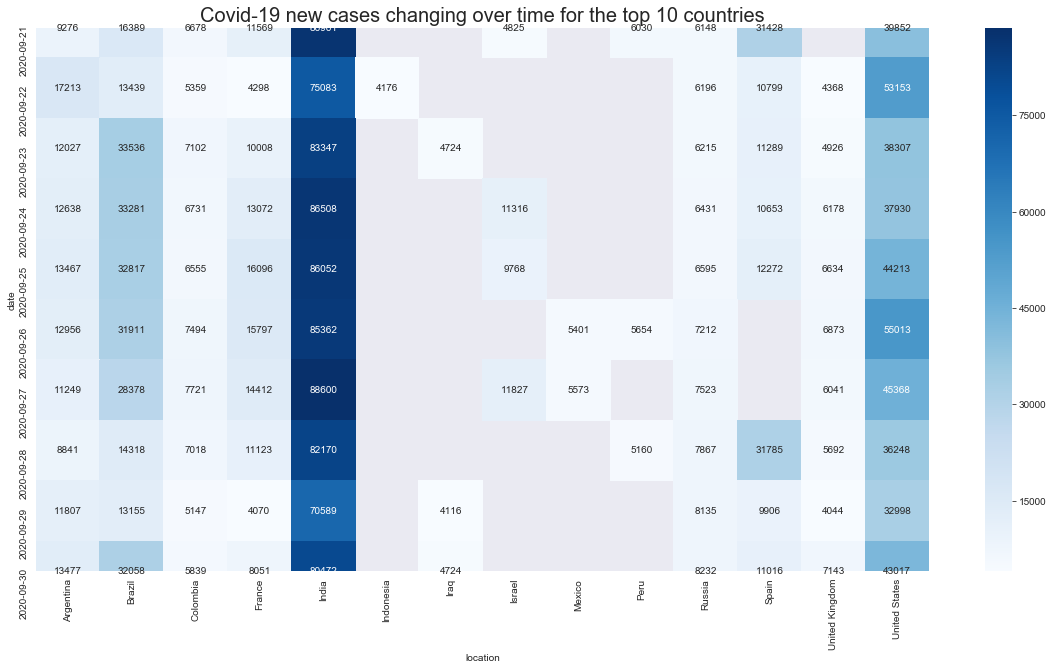

In [32]:
# Change figure size to avoid overlap
plt.figure(figsize=(20,10))

#plotting heatmap using Seaborn
sns.heatmap(top10_countries_pivot,cmap='Blues',annot=True,fmt='.0f').set_title('Covid-19 new cases changing over time for the top 10 countries',
                                                                 fontsize=20)

In [33]:
# pivot based on continents
# pivot works fine if we have only one record per index and column like we have only 1 record per date per country
# if we have more than one record like in case of continent, we need to have an aggeration function i.e.
# each continent can have multiple countries.
continent_pivot = data_filtered.pivot_table(index='date',columns='continent', values='new_cases', aggfunc='sum')
continent_pivot

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-09-21,7831.0,118869.0,69356.0,47732.0,62.0,42318.0
2020-09-22,6156.0,106877.0,46442.0,62775.0,67.0,43495.0
2020-09-23,6779.0,112053.0,53793.0,48228.0,78.0,60408.0
2020-09-24,8536.0,128053.0,61085.0,48310.0,83.0,64824.0
2020-09-25,8275.0,124770.0,67052.0,56464.0,12.0,64554.0
2020-09-26,7946.0,115017.0,57042.0,67671.0,72.0,64037.0
2020-09-27,7322.0,128284.0,51355.0,56802.0,86.0,58317.0
2020-09-28,7582.0,113872.0,75764.0,44856.0,25.0,39908.0
2020-09-29,5848.0,100410.0,46197.0,43495.0,376.0,37519.0


Text(0.5, 1, 'Covid-19 New cases reported in each Continent')

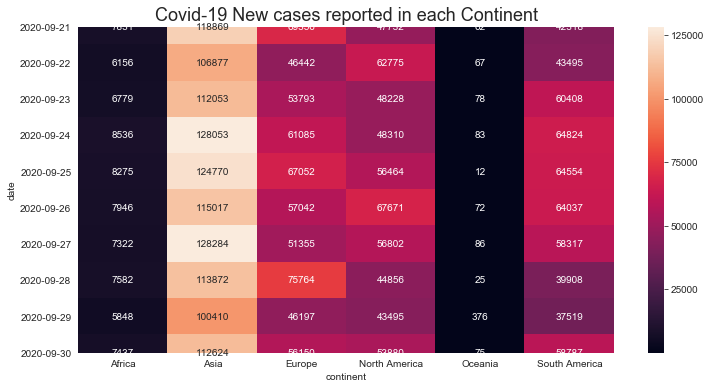

In [34]:
# change figure size to avoid overlap
plt.figure(figsize=(12,6))

# generating heatmap for number of new cases reported in each continent
sns.heatmap(continent_pivot, annot=True, fmt='.0f')\
.set_title('Covid-19 New cases reported in each Continent', fontsize=18)

## idxmin and idxmax

In [36]:
# In the above case we just selected top 10 countries before doing the pivot but lets say
# we need to find out country having maximum or minimum cases from the pivot data itself. 
countries_day_wise = data_filtered.pivot(index='date',columns='location', values='new_cases')
countries_day_wise.iloc[:5,:5]

location,Afghanistan,Albania,Algeria,Andorra,Angola
date,,,,,
2020-09-21,0.0,159.0,203.0,0.0,90.0
2020-09-22,30.0,150.0,197.0,117.0,126.0
2020-09-23,71.0,131.0,191.0,0.0,119.0
2020-09-24,25.0,121.0,186.0,72.0,0.0
2020-09-25,16.0,134.0,179.0,0.0,127.0


In [37]:
countries_day_wise.shape

(10, 210)

In [38]:
#Now we can find maximum number of new cases across all countries using max over axis=1(columns)
countries_day_wise.max(axis=1)

date
2020-09-21    86961.0
2020-09-22    75083.0
2020-09-23    83347.0
2020-09-24    86508.0
2020-09-25    86052.0
2020-09-26    85362.0
2020-09-27    88600.0
2020-09-28    82170.0
2020-09-29    70589.0
2020-09-30    80472.0
dtype: float64

In [41]:
#What is we find which country has the maximum cases for a day
# we can use idxmin for that
countries_day_wise.idxmax(axis=1)

date
2020-09-21    India
2020-09-22    India
2020-09-23    India
2020-09-24    India
2020-09-25    India
2020-09-26    India
2020-09-27    India
2020-09-28    India
2020-09-29    India
2020-09-30    India
dtype: object

In [40]:
#And for minumum cases
countries_day_wise.idxmin(axis=1)

date
2020-09-21    Afghanistan
2020-09-22       Anguilla
2020-09-23        Andorra
2020-09-24         Angola
2020-09-25        Andorra
2020-09-26       Anguilla
2020-09-27        Andorra
2020-09-28    Afghanistan
2020-09-29       Anguilla
2020-09-30        Andorra
dtype: object

In [42]:
top10_countries_pivot.idxmin(axis=1)

date
2020-09-21            Israel
2020-09-22         Indonesia
2020-09-23              Iraq
2020-09-24    United Kingdom
2020-09-25          Colombia
2020-09-26            Mexico
2020-09-27            Mexico
2020-09-28              Peru
2020-09-29    United Kingdom
2020-09-30              Iraq
dtype: object

## Multi Index data

In [43]:
# Lets say we have multiple queries like, we need to find data for specific day for specific continent
# specific location specific day
# few locations specific day
# there are many ways to do this but lets how easy it is using multiindex
# creating index on ['continent','location','date']
indexed_data=data_filtered.set_index(['continent','location','date']).sort_index()

In [46]:
# Now our data is indexed on continent, country and date
# Lets see how easily we can retreive our queries
indexed_data.head(10)

iso_code  new_cases  new_deaths  new_tests
continent location date                                                 
Africa    Algeria  2020-09-21      DZA      203.0         7.0        NaN
                   2020-09-22      DZA      197.0         7.0        NaN
                   2020-09-23      DZA      191.0        10.0        NaN
                   2020-09-24      DZA      186.0         9.0        NaN
                   2020-09-25      DZA      179.0         5.0        NaN
                   2020-09-26      DZA      175.0         4.0        NaN
                   2020-09-27      DZA      160.0         4.0        NaN
                   2020-09-28      DZA      153.0         3.0        NaN
                   2020-09-29      DZA      146.0         5.0        NaN
                   2020-09-30      DZA      155.0         7.0        NaN

In [47]:
# see how pandas has created the index
indexed_data.index.values

array([('Africa', 'Algeria', '2020-09-21'),
       ('Africa', 'Algeria', '2020-09-22'),
       ('Africa', 'Algeria', '2020-09-23'), ...,
       (nan, 'International', '2020-09-28'),
       (nan, 'International', '2020-09-29'),
       (nan, 'International', '2020-09-30')], dtype=object)

In [49]:
# access first row
indexed_data.loc[('Africa','Algeria','2020-09-21')]

iso_code      DZA
new_cases     203
new_deaths      7
new_tests     NaN
Name: (Africa, Algeria, 2020-09-21), dtype: object

In [51]:
# new cases reports in North America in United States on 7th August
indexed_data.loc[('North America','United States','2020-09-30'),'new_cases']

43017.0

In [53]:
# new cases reported in Asia on 7th August

# here we want it for all countries in Asia so we can pass slice(None) as part of location index
# this will give details about all the countries
indexed_data.loc[('Asia',slice(None),'2020-09-30'),'new_cases']

continent  location              date      
Asia       Afghanistan           2020-09-30       15.0
           Armenia               2020-09-30      327.0
           Azerbaijan            2020-09-30       58.0
           Bahrain               2020-09-30      574.0
           Bangladesh            2020-09-30     1488.0
           Bhutan                2020-09-30        1.0
           Brunei                2020-09-30        0.0
           Cambodia              2020-09-30        0.0
           China                 2020-09-30       23.0
           Georgia               2020-09-30        0.0
           India                 2020-09-30    80472.0
           Indonesia             2020-09-30     4002.0
           Iran                  2020-09-30     3677.0
           Iraq                  2020-09-30     4724.0
           Israel                2020-09-30     3661.0
           Japan                 2020-09-30      516.0
           Jordan                2020-09-30      823.0
           Kazakhstan

In [54]:
# we can pass multiple values as part of any index as well
# lets find new cases reported in India on 6th and 7th August
indexed_data.loc[(slice(None),'India',['2020-09-29','2020-09-30']),'new_cases']

continent  location  date      
Asia       India     2020-09-29    70589.0
                     2020-09-30    80472.0
Name: new_cases, dtype: float64

In [55]:
# new cases reported in India and United States on 6th and 7th August
indexed_data.loc[(slice(None),['India','United States'],['2020-09-28','2020-09-29']),'new_cases']

continent      location       date      
Asia           India          2020-09-28    82170.0
                              2020-09-29    70589.0
North America  United States  2020-09-28    36248.0
                              2020-09-29    32998.0
Name: new_cases, dtype: float64

## Combining column Indexes

In [56]:
# Many times we have multilevel column indexes in the dataset
# Like for our aggregation, here we have multiple column index

grouped_data=data_filtered.groupby('date').agg({'new_cases':['sum','max','min']})

In [57]:
grouped_data.head()

new_cases              
                 sum      max  min
date                              
2020-09-21  286168.0  86961.0  0.0
2020-09-22  265812.0  75083.0  0.0
2020-09-23  281339.0  83347.0  0.0
2020-09-24  310891.0  86508.0  0.0
2020-09-25  321127.0  86052.0  0.0

In [58]:
# Columns in grouped data
grouped_data.columns

MultiIndex([('new_cases', 'sum'),
            ('new_cases', 'max'),
            ('new_cases', 'min')],
           )

In [59]:
# we can combine the columns above like new_cases_sum, new_cases_max, new_cases_min using
# this will work for level 2 columns only, basically we are joining the tuple
new_columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in grouped_data.columns]
new_columns

['new_cases_sum', 'new_cases_max', 'new_cases_min']

In [60]:
# change our data columns
grouped_data.columns = new_columns

In [61]:
grouped_data.reset_index()

,date,new_cases_sum,new_cases_max,new_cases_min
0,2020-09-21,286168.0,86961.0,0.0
1,2020-09-22,265812.0,75083.0,0.0
2,2020-09-23,281339.0,83347.0,0.0
3,2020-09-24,310891.0,86508.0,0.0
4,2020-09-25,321127.0,86052.0,0.0
5,2020-09-26,311785.0,85362.0,0.0
6,2020-09-27,302166.0,88600.0,0.0
7,2020-09-28,282007.0,82170.0,0.0
8,2020-09-29,233845.0,70589.0,0.0
9,2020-09-30,288953.0,80472.0,0.0
